In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from dataset_dir import excel_dir,stata_dir

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
pd.io.formats.excel.ExcelFormatter.header_style = None
pd.options.display.max_rows = None
pd.options.display.max_columns = None
r=pd.read_stata(stata_dir()+"Teamup_women_Dataset_Lagos.dta",convert_categoricals=False)
r=r[r['level2']==7]

In [8]:
data=r.copy()
cut_starting=list(data.columns[:26])
cut_ending=list(data.columns[-23:])
for i,j in enumerate(cut_ending):
    if(j=="instanceid"):
        del cut_ending[i]
    

for c in cut_starting:
    del data[c]
for c in cut_ending:
    del data[c]

In [9]:
df=data.copy()

Exploratory data analysis

In [10]:
df.shape

(760, 10470)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 2287
Columns: 10470 entries, resp_select to instanceid
dtypes: float64(1449), int8(8749), object(272)
memory usage: 16.3+ MB


Drop redundant features

In [12]:
red=[]
for i in df.columns:
    if(df[i].isnull().sum()==df.shape[0]):
        red.append(i)
for i in red:
    del df[i]

In [13]:
df.shape

(760, 9824)

fill missing values with special number

In [14]:
for i in df.columns:
    df[i]=df[i].fillna(-91)

In [15]:
df.shape

(760, 9824)

In [16]:
y=pd.read_excel(excel_dir()+"y.xlsx")

In [17]:
y_ids=y['Respondent ID']

In [18]:
x=df[df['resp_select'].isin(y_ids)]

In [19]:
x.shape

(107, 9824)

In [20]:
target=y[['Respondent ID','profile']]
target['resp_select']=y['Respondent ID']
del target['Respondent ID']

In [49]:
m=pd.merge(x,target,how='right',on='resp_select')

In [50]:
m.shape

(107, 9825)

declare vector and target variables

In [51]:
del m['res_name']
del m['ward']
del m['hh_name']
del m['q102']
del m['q106_cal']
del m['q211_strategy1']
del m['instanceid']
del m['resp_select']
del m['strat_lab1']

for i in m.columns:
    if(i[0]=="v"):
        del m[i]
for i in m.columns:
    if('strategy' in i):
        del m[i]
for i in m.columns:
    if('cal' in i):
        del m[i]
for i in m.columns:
    if('lab' in i):
        del m[i]
m=m.replace('',-91)
for i in m.columns:
    if(i!='profile'):
        if(m[i].dtype=='object'):
            del m[i]

for i in m.columns:
    if(i!='profile'):
        m[i]=m[i].astype(int)        

In [52]:
X=m
y=m['profile']

In [54]:
le = LabelEncoder()

X['profile'] = le.fit_transform(X['profile'])

y = le.transform(y)

In [182]:
X.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 106
Data columns (total 9410 columns):
 #     Column           Non-Null Count  Dtype
---    ------           --------------  -----
 0     q12              107 non-null    int32
 1     q13              107 non-null    int32
 2     q101             107 non-null    int32
 3     ageyr            107 non-null    int32
 4     q105             107 non-null    int32
 5     q106             107 non-null    int32
 6     q106b            107 non-null    int32
 7     q107             107 non-null    int32
 8     q108             107 non-null    int32
 9     q109             107 non-null    int32
 10    q201             107 non-null    int32
 11    q202             107 non-null    int32
 12    q202a            107 non-null    int32
 13    q202b            107 non-null    int32
 14    q202c            107 non-null    int32
 15    q202e            107 non-null    int32
 16    q203             107 non-null    int32
 17    q204        

feature scaling

In [55]:
cols=X.columns

In [56]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [57]:
X = pd.DataFrame(X, columns=[cols])

In [58]:
X.head(3)

,q12,q13,q101,ageyr,q105,q106,q106b,q107,q108,q109,q201,q202,q202a,q202b,q202c,q202e,q203,q204,q205,q206_1,q206_2,q206_3,q206_4,q206_5,q206_6,q206_9,q206_10,q206_11,q206_12,q206_13,q206_14,q206_15,q206_16,q206_17,q206_18,q206_19,q206_20,q206_21,q206_22,q206_23,q206_24,q206_25,q206_26,q206_27,q206_28,q206_29,q207,q208,q208b,q208c,q209a,q209b,q210,q211a_1,q211a_2,q211a_3,q211a_4,q211a_5,q211a_6,q211a_7,q211a_8,q211a_9,q211a_10,q211a_11,q211a_12,q211a_13,q211a_14,q211a_15,q211a_16,q211a_17,q211a_18,q211a_19,q211a_20,q211a_21,q211a_22,q211a_23,q211a_24,q211a_25,q211a_26,q211a_27,q211a_28,q211a_96,q211c_1,q211c_2,q211c_3,q211c_4,q211c_5,q211c_6,q211c_7,q211c_8,q211c_9,q211c_10,q211c_11,q211c_12,q211c_13,q211c_14,q211c_15,q211c_16,q211c_17,q211c_18,q211c_19,q211c_20,q211c_21,q211c_22,q211c_23,q211c_24,q211c_25,q211c_26,q211c_27,q211c_28,q211a_c_count,confirm_a,q213a_11,q213a_12,q213a_13,q213a_14,q213a_15,q213a_16,q213a_17,q213a_18,q213a_19,q213a_110,q213a_197,q213a_196,q213c_1,q213a_21,q213a_22,q213a_23,q213a_24,q213a_25,q213a_26,q213a_27,q213a_28,q213a_29,q213a_210,q213a_297,q213a_296,q213c_2,q213a_31,q213a_32,q213a_33,q213a_34,q213a_35,q213a_36,q213a_37,q213a_38,q213a_39,q213a_310,q213a_397,q213a_396,q213b_31,q213b_32,q213b_33,q213b_34,q213b_35,q213b_36,q213b_37,q213b_38,q213b_39,q213b_310,q213b_311,q213b_312,q213b_313,q213b_396,q213c_3,q213a_41,q213a_42,q213a_43,q213a_44,q213a_45,q213a_46,q213a_47,q213a_48,q213a_49,q213a_410,q213a_497,q213a_496,q213b_41,q213b_42,q213b_43,q213b_44,q213b_45,q213b_46,q213b_47,q213b_48,q213b_49,q213b_410,q213b_411,q213b_412,q213b_413,q213b_496,q213c_4,q213a_51,q213a_52,q213a_53,q213a_54,q213a_55,q213a_56,q213a_57,q213a_58,q213a_59,q213a_510,q213a_597,q213a_596,q213b_51,q213b_52,q213b_53,q213b_54,q213b_55,q213b_56,q213b_57,q213b_58,q213b_59,q213b_510,q213b_511,q213b_512,q213b_513,q213b_596,q213c_5,q213a_61,q213a_62,q213a_63,q213a_64,q213a_65,q213a_66,q213a_67,q213a_68,q213a_69,q213a_610,q213a_697,q213a_696,q213b_61,q213b_62,q213b_63,q213b_64,q213b_65,q213b_66,q213b_67,q213b_68,q213b_69,q213b_610,q213b_611,q213b_612,q213b_613,q213b_696,q213c_6,q213a_71,q213a_72,q213a_73,q213a_74,q213a_75,q213a_76,q213a_77,q213a_78,q213a_79,q213a_710,q213a_797,q213a_796,q213c_7,q213a_81,q213a_82,q213a_83,q213a_84,q213a_85,q213a_86,q213a_87,q213a_88,q213a_89,q213a_810,q213a_897,q213a_896,q213c_8,q213a_91,q213a_92,q213a_93,q213a_94,q213a_95,q213a_96,q213a_97,q213a_98,q213a_99,q213a_910,q213a_997,q213a_996,q213b_91,q213b_92,q213b_93,q213b_94,q213b_95,q213b_96,q213b_97,q213b_98,q213b_99,q213b_910,q213b_911,q213b_912,q213b_913,q213b_996,q213c_9,q213a_10,q213a_101,q213a_102,q213a_103,q213a_104,q213a_105,q213a_106,q213a_107,q213a_108,q213a_109,q213a_1010,q213a_1097,q213a_1096,q213b_10,q213b_101,q213b_102,q213b_103,q213b_104,q213b_105,q213b_106,q213b_107,q213b_108,q213b_109,q213b_1010,q213b_1011,q213b_1012,q213b_1013,q213b_1096,q213c_10,q213a_111,q213a_112,q213a_113,q213a_114,q213a_115,q213a_116,q213a_117,q213a_118,q213a_119,q213a_1110,q213a_1197,q213a_1196,q213c_11,q213a_121,q213a_122,q213a_123,q213a_124,q213a_125,q213a_126,q213a_127,q213a_128,q213a_129,q213a_1210,q213a_1297,q213a_1296,q213b_121,q213b_122,q213b_123,q213b_124,q213b_125,q213b_126,q213b_127,q213b_128,q213b_129,q213b_1210,q213b_1211,q213b_1212,q213b_1213,q213b_1296,q213c_12,q213aa_13,q213a_131,q213a_132,q213a_133,q213a_134,q213a_135,q213a_136,q213a_137,q213a_138,q213a_139,q213a_1310,q213a_1397,q213a_1396,q213b_13,q213b_131,q213b_132,q213b_133,q213b_134,q213b_135,q213b_136,q213b_137,q213b_138,q213b_139,q213b_1310,q213b_1311,q213b_1312,q213b_1313,q213b_1396,q213c_13,q213a_141,q213a_142,q213a_143,q213a_144,q213a_145,q213a_146,q213a_147,q213a_148,q213a_149,q213a_1410,q213a_1497,q213a_1496,q213b_141,q213b_142,q213b_143,q213b_144,q213b_145,q213b_146,q213b_147,q213b_148,q213b_149,q213b_1410,q213b_1411,q213b_1412,q213b_1413,q213b_1496,q213c_14,q213a_151,q213a_152,q213a_153,q213a_154,q213a_155,q213a_156,q213a_157,q213a_158,q213a_159,q213a_1510,q213a_1597,q213a_1596,q213b_1

Kmeans model with 4 clusters

In [88]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=5) 

kmeans.fit(X)

KMeans(n_clusters=4, random_state=5)

In [89]:
kmeans.cluster_centers_

array([[1.        , 0.        , 0.25      , ..., 0.        , 0.        ,
        1.        ],
       [0.15254237, 0.13220339, 0.53995157, ..., 0.81603107, 0.82107286,
        0.35028249],
       [0.2       , 0.08      , 0.43265306, ..., 0.60416667, 0.60854197,
        0.56190476],
       [0.16666667, 0.15833333, 0.4375    , ..., 0.63975694, 0.64089347,
        1.        ]])

In [90]:
kmeans.inertia_

2878.176030413129

In [91]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 40 out of 107 samples were correctly labeled.


In [92]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.37


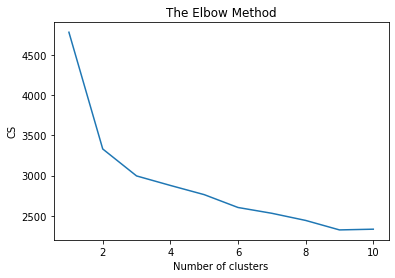

In [93]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 5)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()